In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [13]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = np.mean(group1) - np.mean(group2)

    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1)
    var2 = np.var(group2)

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

## Import Data

In [6]:
import data_cleaning

In [7]:
clean_data = data_cleaning.full_clean()

In [20]:
clean_data.head(2)

,average_covered_charges,average_medicare_payments,average_total_payments,drg_definition,provider_name,total_discharges,full_address,geoid,csi,out_of_pocket,perc_covered
0,1126268.58,182770.86,189464.00,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,FLORIDA HOSPITAL,189464,"601 E ROLLINS ST, ORLANDO, FL",12095012800,1,6693.14,0.162280
1,1050063.13,252782.53,301640.47,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,JACKSON MEMORIAL HOSPITAL,301640,"1611 NW 12TH AVE, MIAMI, FL",12086003001,1,48857.94,0.240731


## Preliminary Analysis 

In [79]:
len(clean_data.drg_definition.unique())

573

In [80]:
procs_more_in_rural = []

for i in clean_data.drg_definition.unique():
    metro = clean_data.loc[(clean_data.csi == '1') & (clean_data.drg_definition == i)]['average_covered_charges']
    non_metro = clean_data.loc[(clean_data.csi != '1') & (clean_data.drg_definition == i)]['average_covered_charges']
    if (np.mean(metro) - np.mean(non_metro)) < 0:
        procs_more_in_rural.append(i)
    

In [81]:
len(procs_more_in_rural)

18

In [86]:
procs_more_in_rural

['103 - HEADACHES W/O MCC',
 '227 - CARDIAC DEFIBRILLATOR IMPLANT W/O CARDIAC CATH W/O MCC',
 '250 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W MCC',
 '354 - HERNIA PROCEDURES EXCEPT INGUINAL & FEMORAL W CC',
 '355 - HERNIA PROCEDURES EXCEPT INGUINAL & FEMORAL W/O CC/MCC',
 '406 - PANCREAS, LIVER & SHUNT PROCEDURES W CC',
 '407 - PANCREAS, LIVER & SHUNT PROCEDURES W/O CC/MCC',
 '415 - CHOLECYSTECTOMY EXCEPT BY LAPAROSCOPE W/O C.D.E. W CC',
 '492 - LOWER EXTREM & HUMER PROC EXCEPT HIP,FOOT,FEMUR W MCC',
 '556 - SIGNS & SYMPTOMS OF MUSCULOSKELETAL SYSTEM & CONN TISSUE W/O MCC',
 '561 - AFTERCARE, MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE W/O CC/MCC',
 '620 - O.R. PROCEDURES FOR OBESITY W CC',
 '841 - LYMPHOMA & NON-ACUTE LEUKEMIA W CC',
 '740 - UTERINE,ADNEXA PROC FOR NON-OVARIAN/ADNEXAL MALIG W CC',
 '775 - VAGINAL DELIVERY W/O COMPLICATING DIAGNOSES',
 '896 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W MCC',
 '964 - OTHER MULTIPLE SIGNIFICANT TRAUMA W CC',
 '98

In [197]:
sig_procs = []
sig_cohens = []

for i in clean_data.drg_definition.unique():
    metro = clean_data.loc[(clean_data.csi == '1') & (clean_data.drg_definition == i)]['average_covered_charges']
    non_metro = clean_data.loc[(clean_data.csi != '1') & (clean_data.drg_definition == i)]['average_covered_charges']
    if st.ttest_ind(metro, non_metro, equal_var=False)[1] < 0.05:
        sig_procs.append(i)
        sig_cohens.append(Cohen_d(metro, non_metro))

/home/peter/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/peter/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [91]:
len(sig_procs)

192

In [198]:
sig_cohens

[0.428297323466941,
 0.38162697296429604,
 0.5074084983780064,
 0.4337388157752425,
 1.131001728741613,
 0.7856382054557871,
 0.6938059290394213,
 0.5999858156831684,
 0.657920244325758,
 0.7646548003560736,
 0.605690560665732,
 0.609289370876221,
 0.46299116956455455,
 0.6585831519370593,
 0.5105680880008042,
 0.5997222131789354,
 0.5322314066977563,
 0.479675905176976,
 0.8712876574172062,
 0.4972767348382874,
 0.4914074806295563,
 0.6866032472491335,
 0.5699991986224819,
 0.7156245616791983,
 0.6460116753127373,
 0.5197704690915432,
 0.7414134672756708,
 0.6576744347322886,
 0.7329429508385175,
 0.587546859752579,
 0.6933254024483264,
 0.8365417273254546,
 0.9597506382028894,
 0.6891759074803984,
 0.6930931697819368,
 0.6468000767384341,
 0.6926168044431357,
 0.6615618168805871,
 0.6071756866064641,
 0.6180851759043028,
 0.6557658706707808,
 0.9620739925477056,
 0.4105394487072672,
 0.4570004876947162,
 0.4730694702486111,
 0.5952490503194245,
 0.6505898728301512,
 0.746031459611412

In [97]:
sig_procs = pd.Series(sig_procs)

In [243]:
dict_sig_procs = pd.DataFrame(zip(sig_procs, sig_cohens))

In [244]:
dict_sig_procs

,0,1
0,038 - EXTRACRANIAL PROCEDURES W CC,0.428297
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.381627
2,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,0.507408
3,054 - NERVOUS SYSTEM NEOPLASMS W MCC,0.433739
4,055 - NERVOUS SYSTEM NEOPLASMS W/O MCC,1.131002
5,056 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W MCC,0.785638
6,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,0.693806
7,069 - TRANSIENT ISCHEMIA,0.599986
8,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,0.657920
9,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,0.764655


In [112]:
relevant_codes = sig_procs.map(lambda x: x[0:3]).astype(int)

In [117]:
relevant_codes.dtype

dtype('int64')

In [151]:
drg = pd.read_csv('data/DRG.csv')
drg['group_size'] = drg.Code_End-drg.Code_Start

drg_d = drg.to_dict('records')

code_ref = []
for i in range(0,len(drg_d)):
    for c in relevant_codes:
        if drg_d[i]['Code_Start'] <= c <= drg_d[i]['Code_End']:
            code_ref.append({'Code': c,'Code_Start':drg_d[i]['Code_Start'],'Code_End':
                             drg_d[i]['Code_End'],'Group':drg_d[i]['Description']})
code_map = pd.DataFrame.from_dict(code_ref)
           

    Code_Start  Code_End                                        Description  \
0            1        17                                            PRE-MDC   
1           20       103  MDC 01: DISEASES & DISORDERS OF THE NERVOUS SY...   
2          113       125            MDC 02: DISEASES & DISORDERS OF THE EYE   
3          129       159  MDC 03: DISEASES & DISORDERS OF THE EAR, NOSE,...   
4          163       208  MDC 04: DISEASES & DISORDERS OF THE RESPIRATOR...   
5          215       316  MDC 05: DISEASES & DISORDERS OF THE CIRCULATOR...   
6          326       395  MDC 06: DISEASES & DISORDERS OF THE DIGESTIVE ...   
7          405       446  MDC 07: DISEASES & DISORDERS OF THE HEPATOBILI...   
8          453       566  MDC 08: DISEASES & DISORDERS OF THE MUSCULOSKE...   
9          570       607  MDC 09: DISEASES & DISORDERS OF THE SKIN, SUBC...   
10         614       645  MDC 10: ENDOCRINE, NUTRITIONAL & METABOLIC DIS...   
11         652       700  MDC 11: DISEASES & DISORDE

In [204]:
code_map['cohend'] = pd.Series(sig_cohens)

In [213]:
cum_cohen_d = code_map.groupby('Group').cohend.sum().reset_index()

In [215]:
cum_cohen_d.columns = ['Description', 'sum_cohen_d']

In [216]:
cum_cohen_d

,Description,sum_cohen_d
0,MDC 01: DISEASES & DISORDERS OF THE NERVOUS SY...,12.211395
1,"MDC 03: DISEASES & DISORDERS OF THE EAR, NOSE,...",0.491407
2,MDC 04: DISEASES & DISORDERS OF THE RESPIRATOR...,15.441093
3,MDC 05: DISEASES & DISORDERS OF THE CIRCULATOR...,29.602112
4,MDC 06: DISEASES & DISORDERS OF THE DIGESTIVE ...,11.992597
5,MDC 07: DISEASES & DISORDERS OF THE HEPATOBILI...,5.854254
6,MDC 08: DISEASES & DISORDERS OF THE MUSCULOSKE...,13.002090
7,"MDC 09: DISEASES & DISORDERS OF THE SKIN, SUBC...",1.937029
8,"MDC 10: ENDOCRINE, NUTRITIONAL & METABOLIC DIS...",4.607626
9,MDC 11: DISEASES & DISORDERS OF THE KIDNEY & U...,7.192570


In [223]:
drg.drop(columns='cum_effect_size', inplace=True)

In [226]:
# proc_sum = pd.merge(drg, cum_cohen_d, on='Description')

In [167]:
num_procs = code_map.groupby('Group').size().reset_index()

In [170]:
num_procs.columns = ['Description', 'num_more_exp']

In [171]:
num_procs

,Description,num_more_exp
0,MDC 01: DISEASES & DISORDERS OF THE NERVOUS SY...,20
1,"MDC 03: DISEASES & DISORDERS OF THE EAR, NOSE,...",1
2,MDC 04: DISEASES & DISORDERS OF THE RESPIRATOR...,23
3,MDC 05: DISEASES & DISORDERS OF THE CIRCULATOR...,48
4,MDC 06: DISEASES & DISORDERS OF THE DIGESTIVE ...,20
5,MDC 07: DISEASES & DISORDERS OF THE HEPATOBILI...,11
6,MDC 08: DISEASES & DISORDERS OF THE MUSCULOSKE...,23
7,"MDC 09: DISEASES & DISORDERS OF THE SKIN, SUBC...",3
8,"MDC 10: ENDOCRINE, NUTRITIONAL & METABOLIC DIS...",8
9,MDC 11: DISEASES & DISORDERS OF THE KIDNEY & U...,11


In [173]:
# proc_sum = pd.merge(drg, num_procs, on='Description')

In [175]:
proc_sum['perc_more_exp'] = proc_sum.num_more_exp/proc_sum.group_size

In [190]:
dng_group_code = proc_sum.Description.map(lambda x: x[0:6])

In [230]:
proc_sum.head(1)

,Code_Start,Code_End,Description,group_size,sum_cohen_d
0,20,103,MDC 01: DISEASES & DISORDERS OF THE NERVOUS SY...,83,12.211395


In [ ]:
sns.set(style = 'dark', palette='bright', context='talk')

Text(0.5, 0, 'Diagnosis Group')

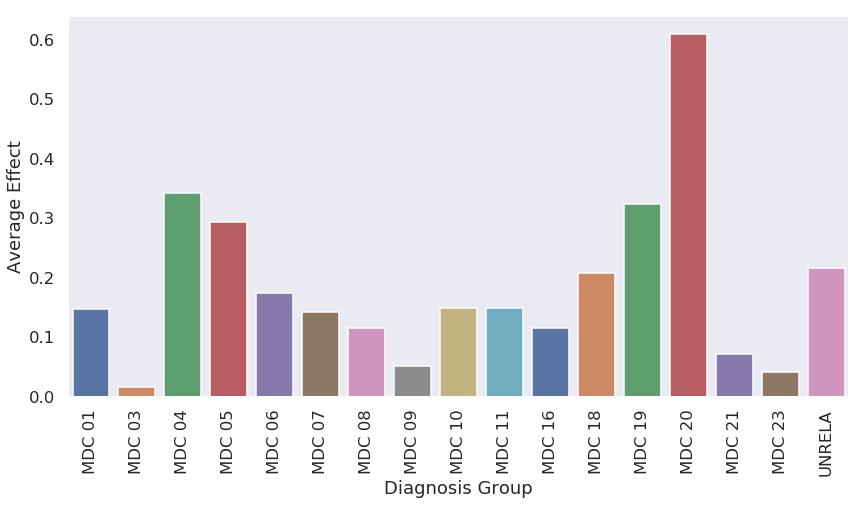

In [262]:
plt.figure(figsize=(14,7))
sns.barplot(dng_group_code, 'avg_cohen_d', data=proc_sum, palette='deep')
plt.xticks(rotation=90)
plt.ylabel('Average Effect')
plt.xlabel('Diagnosis Group')

In [269]:
proc_group_desc = proc_sum.Description.map(lambda x: x[8:])

In [270]:
dng_group_code

0     MDC 01
1     MDC 03
2     MDC 04
3     MDC 05
4     MDC 06
5     MDC 07
6     MDC 08
7     MDC 09
8     MDC 10
9     MDC 11
10    MDC 16
11    MDC 18
12    MDC 19
13    MDC 20
14    MDC 21
15    MDC 23
16    UNRELA
Name: Description, dtype: object

In [273]:
dng_info = pd.DataFrame([dng_group_code, proc_group_desc]).T

In [275]:
dng_info.columns = ['Code', 'Description']

In [285]:
dng_info.Description = dng_info.Description.map(lambda x: x.title())

In [286]:
dng_info.to_csv('.code_describe.csv')

In [235]:
proc_sum['avg_cohen_d'] = proc_sum.sum_cohen_d/proc_sum.group_size

In [236]:
proc_sum

,Code_Start,Code_End,Description,group_size,sum_cohen_d,avg_cohen_d
0,20,103,MDC 01: DISEASES & DISORDERS OF THE NERVOUS SY...,83,12.211395,0.147125
1,129,159,"MDC 03: DISEASES & DISORDERS OF THE EAR, NOSE,...",30,0.491407,0.016380
2,163,208,MDC 04: DISEASES & DISORDERS OF THE RESPIRATOR...,45,15.441093,0.343135
3,215,316,MDC 05: DISEASES & DISORDERS OF THE CIRCULATOR...,101,29.602112,0.293090
4,326,395,MDC 06: DISEASES & DISORDERS OF THE DIGESTIVE ...,69,11.992597,0.173806
5,405,446,MDC 07: DISEASES & DISORDERS OF THE HEPATOBILI...,41,5.854254,0.142787
6,453,566,MDC 08: DISEASES & DISORDERS OF THE MUSCULOSKE...,113,13.002090,0.115063
7,570,607,"MDC 09: DISEASES & DISORDERS OF THE SKIN, SUBC...",37,1.937029,0.052352
8,614,645,"MDC 10: ENDOCRINE, NUTRITIONAL & METABOLIC DIS...",31,4.607626,0.148633
9,652,700,MDC 11: DISEASES & DISORDERS OF THE KIDNEY & U...,48,7.192570,0.149845


In [106]:
type(drg_d[0]['Code_Start'])

int

In [60]:
most_sig_proc = 0

for i in sig_procs:
    largest_cohen_d = 0
    metro = clean_data.loc[clean_data.drg_definition == i]['average_covered_charges']
    non_metro = clean_data.loc[clean_data.drg_definition != i]['average_covered_charges']
    if Cohen_d(metro_charges, non_metro_charges) > largest_cohen_d:
         most_sig_proc = i

In [61]:
most_sig_proc

'975 - HIV W MAJOR RELATED CONDITION W CC'

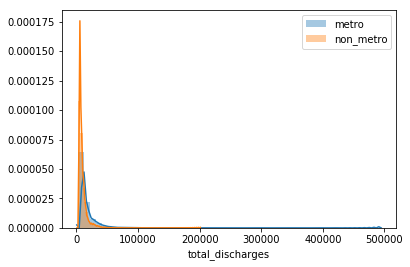

In [68]:
metro = clean_data.loc[clean_data.drg_definition == '975 - HIV W MAJOR RELATED CONDITION W CC']['average_covered_charges']
non_metro = clean_data.loc[clean_data.drg_definition != '975 - HIV W MAJOR RELATED CONDITION W CC']['average_covered_charges']

sns.distplot(metro_charges, label='metro')
sns.distplot(non_metro_charges, label='non_metro')
plt.legend()

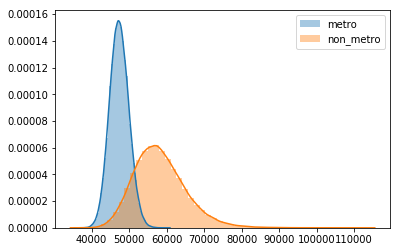

In [69]:
metro_means_ = []

for i in range(0,100000):
    a_mean = np.mean(np.random.choice(metro, size=100))
    metro_means.append(a_mean)

non_metro_means = []

for i in range(0,100000):
    a_mean = np.mean(np.random.choice(non_metro, size=100))
    non_metro_means.append(a_mean)
    
sns.distplot(metro_means, label='metro')
sns.distplot(non_metro_means, label='non_metro')
plt.legend()
plt.x_label = 'Average Hospital Charges'

### Total Hospital Charges

In [36]:
metro_charges = clean_data.loc[clean_data['csi'] == '1']['total_discharges']

In [37]:
non_metro_charges = clean_data.loc[clean_data['csi'] != '1']['total_discharges']

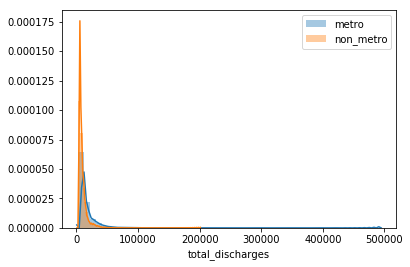

In [38]:
sns.distplot(metro_charges, label='metro')
sns.distplot(non_metro_charges, label='non_metro')
plt.legend()

In [39]:
st.ttest_ind(metro_charges, non_metro_charges, equal_var=False)

Ttest_indResult(statistic=86.20641430287961, pvalue=0.0)

In [40]:
Cohen_d(metro_charges, non_metro_charges)

0.34731628883945115

In [41]:
metro_means = []

for i in range(0,100000):
    a_mean = np.mean(np.random.choice(metro_charges, size=100))
    metro_means.append(a_mean)

non_metro_means = []

for i in range(0,100000):
    a_mean = np.mean(np.random.choice(non_metro_charges, size=100))
    non_metro_means.append(a_mean)

sns.distplot(metro_means, label='metro')
sns.distplot(non_metro_means, label='non_metro')
plt.legend()
plt.x_label = 'Average Hospital Charges'

### Patient Deductible/Charges

In [ ]:
metro_deductible = clean_data.loc[clean_data['CSI'] == '1']['deductible']

In [ ]:
non_metro_deductible = clean_data.loc[clean_data['CSI'] != '1']['deductible']

In [ ]:
sns.distplot(metro_deductible, label='metro')
sns.distplot(non_metro_deductible, label='non_metro')
plt.legend()

In [ ]:
metro_deductible_means = []

for i in range(0,100000):
    a_mean = np.mean(np.random.choice(metro_deductible, size=100))
    metro_deductible_means.append(a_mean)

In [ ]:
non_metro_deductible_means = []

for i in range(0,100000):
    a_mean = np.mean(np.random.choice(non_metro_deductible, size=100))
    non_metro_deductible_means.append(a_mean)

In [ ]:
st.ttest_ind(metro_deductible_means, non_metro_deductible_means, equal_var=False)

In [ ]:
sns.distplot(metro_deductible_means, label='metro')
sns.distplot(non_metro_deductible_means, label='non_metro')
plt.legend()
plt.x_label = 'Deductible'

In [ ]:
Cohen_d(metro_deductible_means, non_metro_deductible_means)